Расширяем поле на весь экран

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100%!important; }<\style>"))

Импортируем файлы

In [2]:
import os 
import csv
import datetime
import numpy as np
import pandas as pd
import ipywidgets as widgets
from settings01 import Settings
from matplotlib import pylab as plt 
from preprocessing_data import Data_Preparation
from IPython.display import display,clear_output

In [3]:
%matplotlib inline
%run -i 'preprocessing_data.py'

# INPUT

In [4]:
%%time
input_file = "InStream8459672526.csv"
df = pd.read_csv(input_file)
df_buff = pd.read_csv(input_file)

CPU times: user 17.8 ms, sys: 13.3 ms, total: 31.1 ms
Wall time: 111 ms


## Column's name

In [5]:
print df.head()

   flow                        id  pressure                      time
0   0.0  5cff936e8bc2845b71510df6     69.32  2019-06-11T07:42:00.235Z
1   0.0  5cff936f8bc2845b71510e17     69.56  2019-06-11T07:42:01.673Z
2   0.0  5cff936e8bc2845b71510e07     69.57  2019-06-11T07:42:01.959Z
3   0.0  5cff93708bc2845b71510e2a     69.45  2019-06-11T07:42:02.387Z
4   0.0  5cff93718bc2845b71510e3b     69.69  2019-06-11T07:42:03.103Z


## Piece of table

In [6]:
#Создаем все наши виджеты для визуализации графиков
min_value = widgets.IntSlider(min = 0,max = len(df)-1,step = 1,value = 0,description='min_val')
max_value = widgets.IntSlider(min = 1,max = len(df),step = 1,value = 1,description='max_val')

chbx_flow = widgets.Checkbox(value=False,description= 'flow',disabled=False)
chbx_id = widgets.Checkbox(value=False,description= 'id',disabled=False)
chbx_time = widgets.Checkbox(value=False,description= 'time',disabled=False)
chbx_pressure = widgets.Checkbox(value=False,description= 'pressure',disabled=False)

settings = widgets.HBox([chbx_flow,chbx_id,chbx_time,chbx_pressure])
sliders_layout = widgets.VBox([min_value,max_value])

button = widgets.Button(description = 'START!',disabled=False)

#Создаем разделы(виджеты) для энкодера и,sp и настроек
accordion = widgets.Accordion(children = [sliders_layout,settings])
accordion.set_title(0,'Sliders')
accordion.set_title(1,'Settings')
#Главный layout
mainLay = widgets.VBox([accordion,button])
# Прописываются действия на нажатия checkbox-ов
# Если нажат checkbox то удалять колонку из df, если же такой колонки нет то добавить колонку в df
def on_button_click(b):
    if chbx_flow.value:
        if not 'flow' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['flow']
    else:
        if not 'flow' in df.columns:
            df.insert(0,'flow',df_buff['flow'])
#====================================================================           
    if chbx_id.value:
        if not 'id' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['id']
    else:
        if not 'id' in df.columns:
            df.insert(0,'id',df_buff['id'])
#=======================================================================
    if chbx_time.value:
        if not 'time' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['time']
    else:
        if not 'time' in df.columns:
            df.insert(0,'time',df_buff['time'])
#========================================================================
    if chbx_pressure.value:
        if not 'pressure' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['pressure']
    else:
        if not 'pressure' in df.columns:
            df.insert(0,'pressure',df_buff['pressure'])
            
    clear_output()
    display(mainLay)
    #вывод среза df-а
    print df[min_value.value:max_value.value]

#Вывод виджетов
button.on_click(on_button_click)
display(mainLay)

VkJveChjaGlsZHJlbj0oQWNjb3JkaW9uKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShJbnRTbGlkZXIodmFsdWU9MCwgZGVzY3JpcHRpb249dSdtaW5fdmFsJywgbWF4PTE5ODApLCBJbnRTbGnigKY=


     flow  pressure                      time
0     0.0     69.32  2019-06-11T07:42:00.235Z
1     0.0     69.56  2019-06-11T07:42:01.673Z
2     0.0     69.57  2019-06-11T07:42:01.959Z
3     0.0     69.45  2019-06-11T07:42:02.387Z
4     0.0     69.69  2019-06-11T07:42:03.103Z
5     0.0     70.27  2019-06-11T07:42:04.532Z
6     0.0     68.98  2019-06-11T07:42:04.817Z
7     0.0     69.98  2019-06-11T07:42:05.256Z
8     0.0     70.35  2019-06-11T07:42:06.686Z
9     0.0     70.35  2019-06-11T07:42:06.973Z
10    0.0     70.58  2019-06-11T07:42:07.401Z
11    0.0     70.20  2019-06-11T07:42:08.115Z
12    0.0     70.74  2019-06-11T07:42:09.555Z
13    0.0     70.60  2019-06-11T07:42:09.831Z
14    0.0     71.06  2019-06-11T07:42:10.279Z
15    0.0     70.75  2019-06-11T07:42:11.708Z
16    0.0     70.73  2019-06-11T07:42:11.994Z
17    0.0     70.59  2019-06-11T07:42:12.423Z
18    0.0     70.31  2019-06-11T07:42:13.558Z
19    0.0     70.94  2019-06-11T07:42:15.351Z
20    0.0     70.10  2019-06-11T07

## Drawing graphs & preproccesing data 

In [7]:
preprocessing_data = Data_Preparation(df_buff)
data = preprocessing_data.prepare()

Version 1_18_14:15
Time cut zero 0.0454368591309
Length start_id 6
Length dataframe after learn 3


### We draw 2 grphics: flow and pressure and real flow & pressure as point

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oQm91bmRlZEludFRleHQodmFsdWU9MCwgZGVzY3JpcHRpb249dSdNaW5pbXVtJywgbWF4PTE5ODApLCBCb3VuZGXigKY=


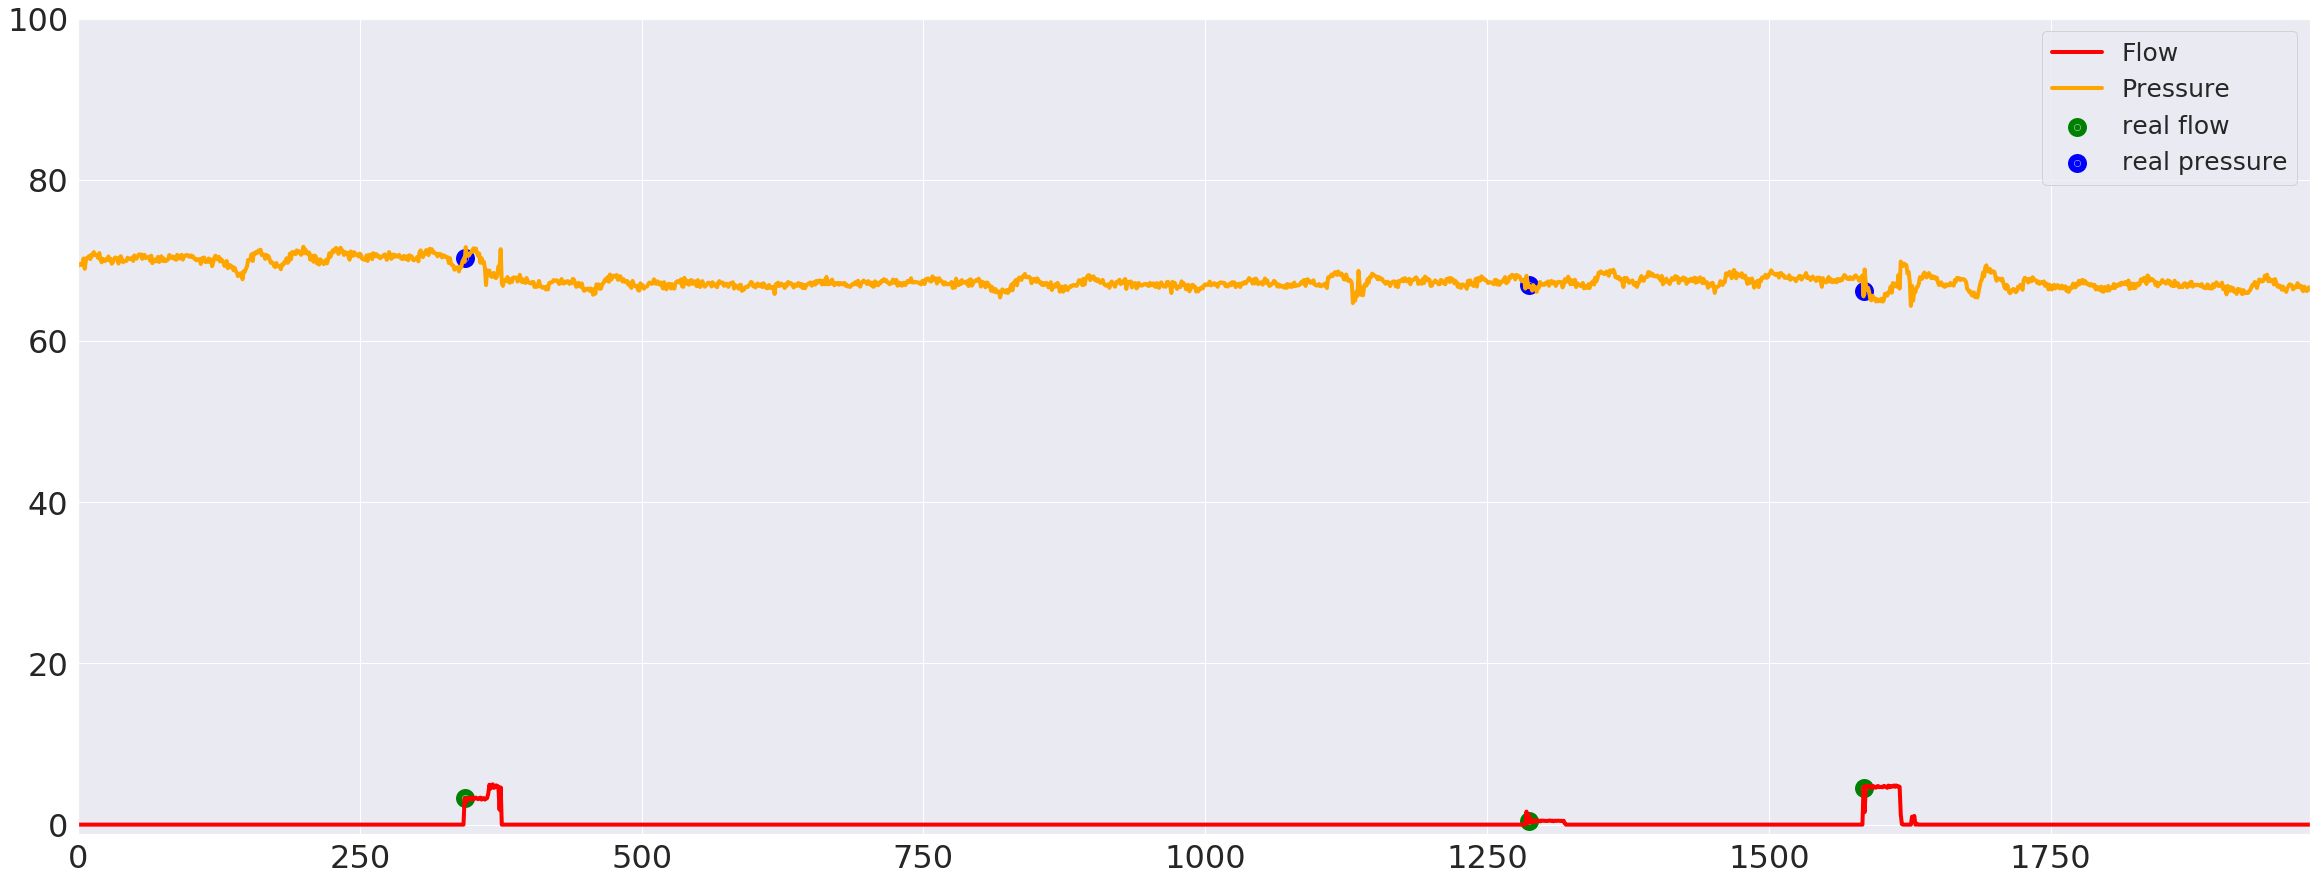

In [20]:
#Создаем виджеты для визуализации графиков
value_min = widgets.BoundedIntText(value = 0,min = 0,max = len(df)-1,step =1, description ='Minimum',disabled = False)
value_max = widgets.BoundedIntText(value = 1,min = 0,max = len(df),step =1, description ='Maximum',disabled = False)
chbx_flow_chart = widgets.Checkbox(value=False,description= 'flow',disabled=False)
chbx_pressure_chart = widgets.Checkbox(value=False,description= 'pressure',disabled=False)
button_start = widgets.Button(description = 'START!',disabled=False)

spin_layout = widgets.HBox([value_min,value_max])
widget = widgets.HBox([spin_layout,chbx_pressure_chart,chbx_flow_chart])
main_layout = widgets.VBox([widget,button_start])
# Ф-ция которая прорисовывает pressure & flow, а так же поле для графиков(Можно настроить размер выводимого графика и тд), а так же показывает real flow & real pressure
def on_button_clicked(b):
    clear_output()
    display(main_layout)
        
    plt.figure(figsize = (40, 15))
    plt.axis([value_min.value,value_max.value, -1.2, 100])
    plt.tick_params(axis ='both',which ='major',labelsize = 32)
    # Проверка на нажатие checkbox-ов(если нажат, то выводит тот или иной график)
    if chbx_flow_chart.value:
        flow = df_buff['flow']
        plt.plot(flow, 'red', label="Flow", linewidth=4.0)
    if chbx_pressure_chart.value:
        pressure = df_buff['pressure']
        plt.plot(pressure, 'orange', label="Pressure", linewidth=4.0)
    plt.scatter(data['start index'],data['real_flow'], color = 'green',label="real flow",linewidth=13.0) #Вывод real flow
    plt.scatter(data['start index'],data['real_pressure'], color = 'blue',label="real pressure",linewidth=13.0) #Вывод real pressure
    plt.legend(loc='upper right', prop={'size': 25})
    plt.show()     

button_start.on_click(on_button_clicked)
display(main_layout) #Вывод всех виджетов

# ENCODER & SP

In [9]:
#Main class(Settings) + sliders
settings = Settings()
encoder = widgets.FloatSlider(min = 0.001, max = 0.1, step = 0.001,readout = True ,readout_format ='.3f')
sp_column_dim = widgets.IntSlider(min = 1,max = 2048,step = 1,value = 1)
ui = widgets.VBox([encoder,sp_column_dim])
#===================================================================================================================
#Open image "User widgets"
file = open("/var/union-classifier/WIDGETS.png","rb")
image = file.read()
image_wid = widgets.Image(value = image,format = 'png', width = 150, height = 200)
#===================================================================================================================
# main function for visualisation(remove files & create model(learning))
def connect(enc_res,sp_col_dim):
    settings.remove_files()
    settings.createModel(enc_res,sp_col_dim)    
#=====================================================================================================================
# For conclusion
out = widgets.interactive_output(connect,{'enc_res': encoder, 'sp_col_dim': sp_column_dim})
ui_labels = widgets.VBox([widgets.Label(value = "Encoder resolution: "),widgets.Label(value = "Spatial pooler column dimension: ")])
ui_out = widgets.HBox([ui_labels,ui])

/var/union-classifier
Version 1_18_14:15
Reconfigure
Time separate sensors 7.13915300369
Time cut zero 51.7602028847
Length dataframe after learn 500
****************************************************************************************************
Version 1_18_14:15
Reconfigure
Time separate sensors 0.237778902054
Time cut zero 1.31730389595
Length dataframe after learn 910
****************************************************************************************************
Version 1_18_14:15
Reconfigure
Time separate sensors 0.79816198349
Time cut zero 2.53107500076
Length dataframe after learn 789
****************************************************************************************************


In [10]:
#Создание виджетв(spinbox &checkbox)
value_min = widgets.BoundedIntText(value = 0,min = 0,max = len(df)-1,step =1, description ='Minimum',disabled = False)
value_max = widgets.BoundedIntText(value = 1,min = 0,max = len(df),step =1, description ='Maximum',disabled = False)
button_step = widgets.Button(description = 'STEP')

checkBoxPeriod = widgets.Checkbox(value = False,description = 'Period')
checkBoxLearn = widgets.Checkbox(value = False,description = 'Learn')
checkBoxClas = widgets.Checkbox(value = False,description = 'Classify')

spin_layout = widgets.HBox([value_min,value_max])

In [11]:
#Ф-ция которая реагирует на смену значения виджетов при изменении енкодера,sp или среза df.Ф-ция НЕ реагирует на нажатие кнопки Step
def step(enc_res,sp_col_dim,v_min,v_max):
    settings.remove_files()
    settings.createModel(enc_res,sp_col_dim,settings.df1[v_min : v_max])
   
outStep = widgets.interactive_output(step,{'enc_res': encoder, 'sp_col_dim': sp_column_dim,'v_min':value_min,'v_max':value_max})

In [12]:
#Ф-ция которая срабатывает на нажатие кнопки Step(Выводит обновленные виджеты и прорисовывает график Энкодера)
def on_buttonStep_click(b):
    if checkBoxPeriod.value:
        clear_output()
        display(layDisStep,outStep)
        settings.redrawing(settings.enc_array,'encoder')
    
        
button_step.on_click(on_buttonStep_click) #Связывание ф-ции и кнопки

In [13]:
#Cоздание layouts и виджетов
layEnc = widgets.HBox([widgets.Label(value = "Encoder resolution: "),encoder])
lay0Sp = widgets.HBox([widgets.Label(value = "Spatial pooler column dimension: "),sp_column_dim])

checkLayout = widgets.HBox([checkBoxPeriod,checkBoxLearn,checkBoxClas]) 

In [14]:
LayEncStep = widgets.VBox([layEnc,spin_layout])
# Создание разделов Encoder. SP. Settings как виджетов. Отображается после нажатия checkbox-а "Period" и нажатия кнопки "Visualisation"
accordionStep = widgets.Accordion(children = [LayEncStep,checkLayout])
accordionStep.set_title(0,'Encoder')
accordionStep.set_title(1,'Settings')

In [15]:
# Разделы которые отображаются изначально
accordion = widgets.Accordion(children = [layEnc,lay0Sp,checkLayout])
accordion.set_title(0,'Encoder')
accordion.set_title(1,'SP')
accordion.set_title(2,'Settings')


In [16]:
# Создание кнопки и ф-ции, которая реагирует на нажатие кнопки.(По нажатию на разные checkbox-ы срабатывают различные функции)
buttonLearn = widgets.Button(description = 'Visualisation')

def on_clicked_button(state):  
    
    if checkBoxPeriod.value:
        clear_output()
        display(layDisStep)
    if checkBoxLearn.value:
        clear_output()
        display(layDisplay,out)
        settings.redrawing(settings.enc_array,'encoder')
        settings.redrawing(settings.sp_array,'spatial poller')
    if checkBoxClas.value:
        clear_output()
        display(layDisplay,out)
        settings.classify_model()
    if not checkBoxPeriod.value and not checkBoxLearn.value and not checkBoxClas.value:
        clear_output()
        display(layDisplay,out)
        settings.redrawing(settings.enc_array,'encoder')
        settings.redrawing(settings.sp_array,'spatial poller')
        
buttonLearn.on_click(on_clicked_button)

VkJveChjaGlsZHJlbj0oSW1hZ2UodmFsdWU9J1x4ODlQTkdcclxuXHgxYVxuXHgwMFx4MDBceDAwXHJJSERSXHgwMFx4MDBceDAxNVx4MDBceDAwXHgwMCpceDA4XHgwMlx4MDBceDAwXHgwMF3igKY=


T3V0cHV0KG91dHB1dHM9KHt1J291dHB1dF90eXBlJzogdSdzdHJlYW0nLCB1J25hbWUnOiB1J3N0ZG91dCcsIHUndGV4dCc6IHUiUkVNT1ZFXG5FTkM6IDAuMDAxXG5TUF9DT0wgMzc4XG5ERiDigKY=


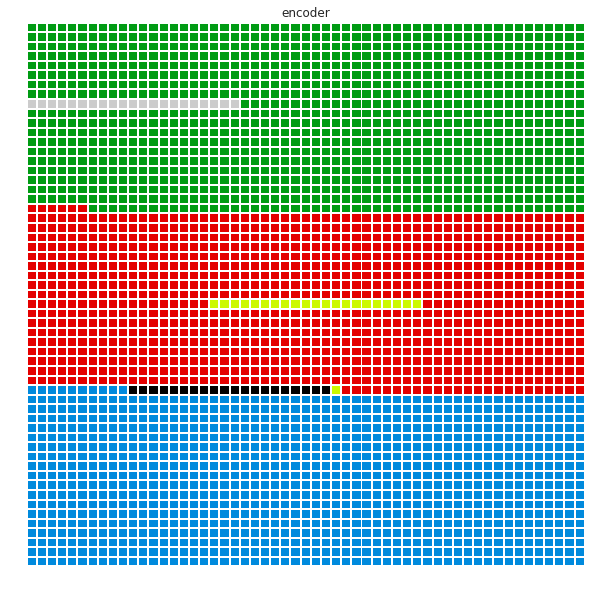

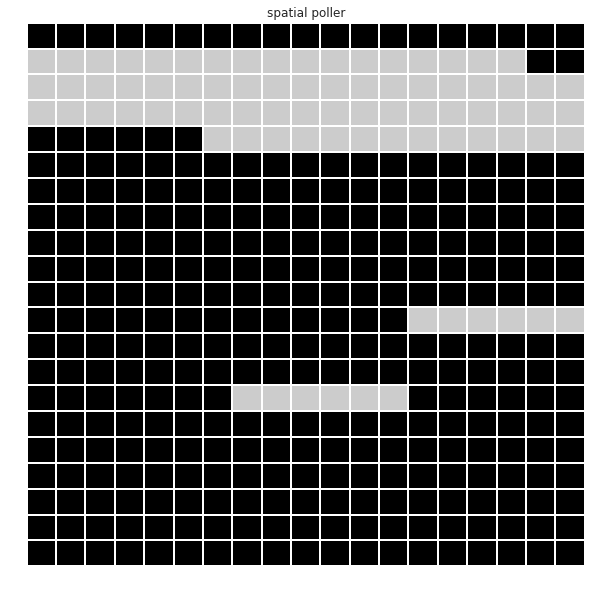

In [17]:
layDisplay = widgets.VBox([image_wid,accordion,buttonLearn])
layDisStep = widgets.VBox([image_wid,accordionStep,buttonLearn,button_step])
display(layDisplay,out) #Отображение виджетов

# UNION

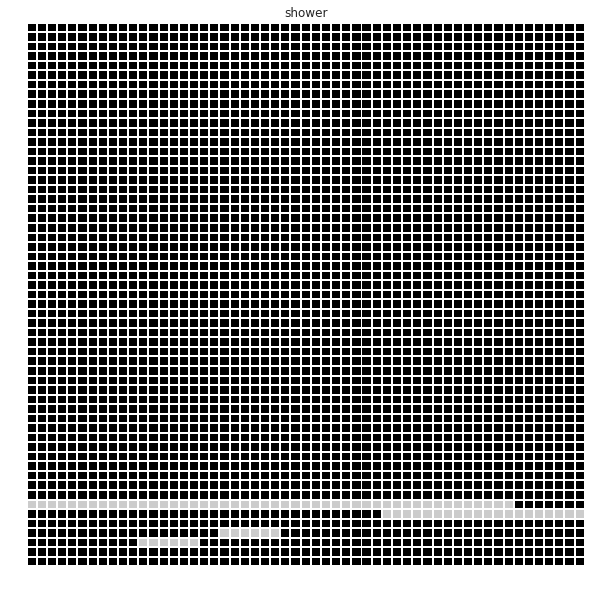

In [19]:
union = settings.get_union('shower')
mas = settings.calculate_array(union) # Пересчет массива для отображения
settings.redrawing(mas,'shower')#Перерисовки Union